## **STEP 4 : Transforming and engineering features**

* Checking the correlation

* Impute missing values

* Label Encoding

* Transform skewed attributes

* ## **Heatmap**

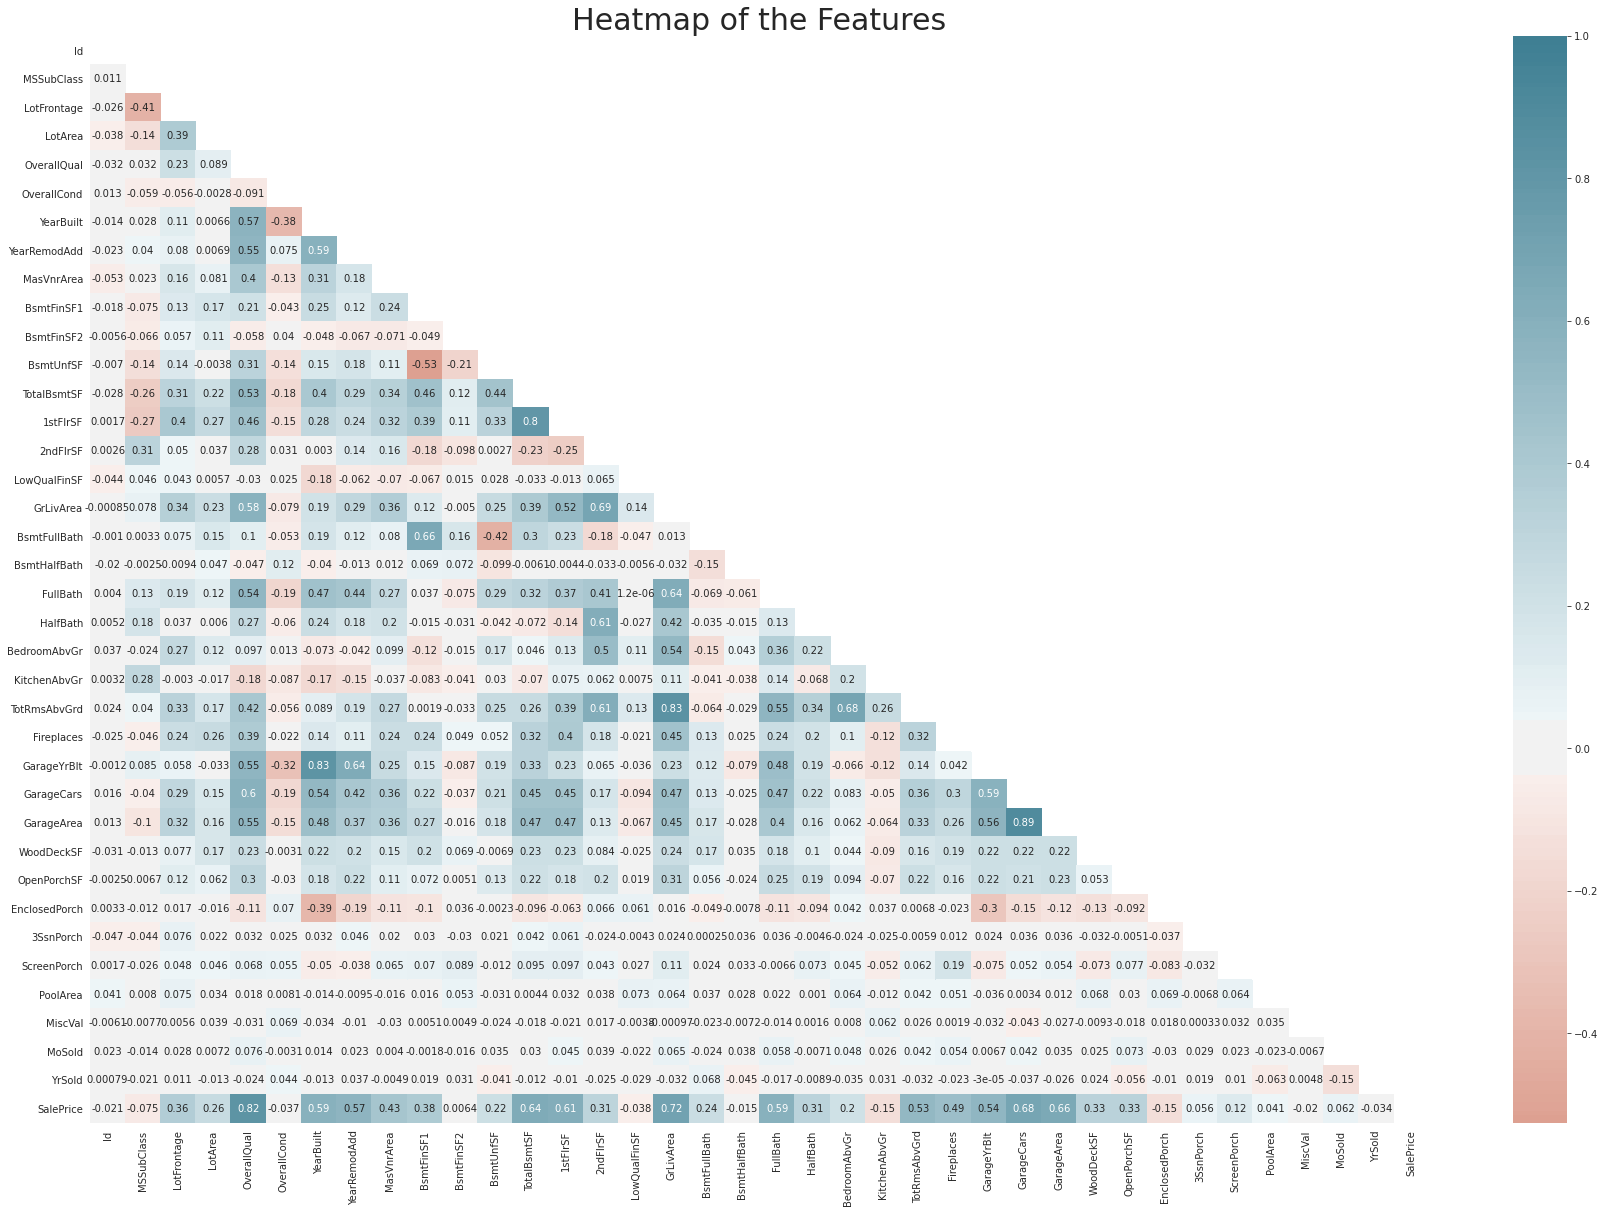

In [99]:
style.use('ggplot')
sns.set_style('whitegrid')

plt.subplots(figsize = (30,20))
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
 
plt.title("Heatmap of the Features", fontsize = 30);

As we can see there is a correlation of:
    
- 83% between the TotRmsABVGr and GrLivArea
- 83% between YearBuilt and Gragae YrBlt
- 89% between GarageCars and GarageArea

* ### **Numerical and Categorical Features**

In [100]:
numerical_features = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = train.dtypes[train.dtypes == "object"].index
print("Number of categorical features:", len(categorical_features))

Number of Numerical features:  38
Number of categorical features: 43


* ### **Dealing With Missing Values**

Text(0.5, 1.0, 'Missing Values Heatmap')

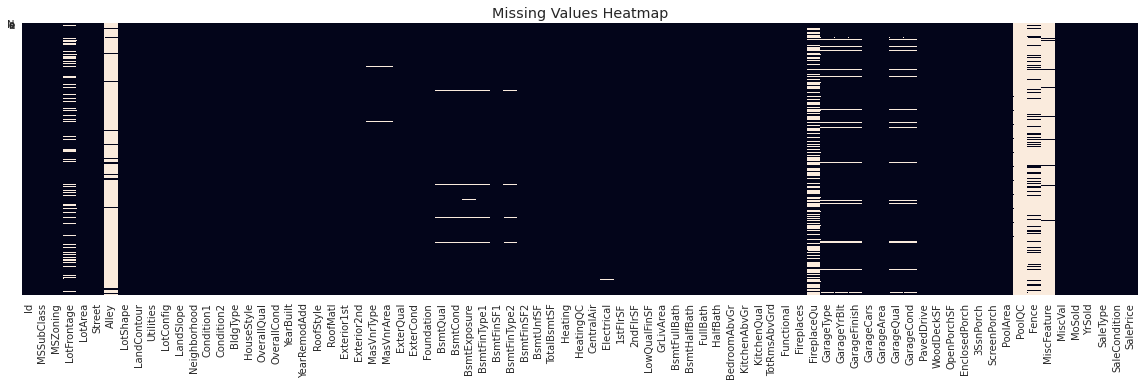

In [101]:

plt.figure(figsize=(20,5))

sns.heatmap(train.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

* ##### **Check the percentage of missing values for each columns in train_data**

In [102]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['total', 'Missing_Ratio'])
missing_data.head(20)

,total,Missing_Ratio
PoolQC,1451,99.7
MiscFeature,1402,96.3
Alley,1365,93.8
Fence,1176,80.8
FireplaceQu,690,47.4
LotFrontage,259,17.8
GarageCond,81,5.6
GarageType,81,5.6
GarageYrBlt,81,5.6
GarageFinish,81,5.6


* ###### **Check the percentage of missing values for each columns in test_data**

In [103]:
total = test.isnull().sum().sort_values(ascending=False)
percent_1 = test.isnull().sum()/test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['total', 'Missing_Ratio'])
missing_data.head(20)

,total,Missing_Ratio
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageQual,78,5.3
GarageYrBlt,78,5.3
GarageFinish,78,5.3


- **LotFrontage**

In [104]:
train['LotFrontage'] = train['LotFrontage'].fillna(train.LotFrontage.mean())

test['LotFrontage'] = test['LotFrontage'].fillna(test.LotFrontage.mean())

- Alley, PoolQC, iscFeature, Fence, GarageCond, GarageQual, GarageFinish, GarageType, FireplaceQu, BsmtExposure, 


   BsmtCond, BsmtQual, BsmtFinType1, BsmtFinType2, MasVnrType

 

In [105]:
list1 =["Alley",
                       "PoolQC",
                      "MiscFeature",
                       "Fence",
                       "GarageCond",
                       "GarageQual",
                       "GarageFinish",
                       "GarageType",
                       "FireplaceQu",
                       "BsmtExposure",
                       "BsmtCond",
                       "BsmtQual",
                       "BsmtFinType1",
                       "BsmtFinType2",
                       "MasVnrType"]
                       
for i in list1:
    
    train[i] = train[i].fillna("None")
    test[i] = test[i].fillna("None")

- MasVnrArea, BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageYrBlt,GarageCars, GarageArea

In [106]:
list2 = ["MasVnrArea",
                          "BsmtFinSF1",
                          "BsmtFinSF2",
                           "BsmtUnfSF",
                          "TotalBsmtSF",
                          "BsmtFullBath",
                          "BsmtHalfBath",
                          "GarageYrBlt",
                          "GarageCars",
                          "GarageArea"]

for i in list2:
    train[i] = train[i].fillna(0)
    test[i] = test[i].fillna(0)

- Utilities, Electrical, Functional

In [107]:
train ["Utilities"]= train ["Utilities"].fillna("AllPub")
train ["Electrical"] = train ["Electrical"] .fillna("SBrkr")
train ["Functional"] = train ["Functional"] .fillna("Typ")

In [108]:
test ["Utilities"]=test ["Utilities"].fillna("AllPub")
test["Electrical"] = test["Electrical"] .fillna("SBrkr")
test ["Functional"] =test ["Functional"] .fillna("Typ")

- Exterior1st, Exterior2nd, KitchenQual, SaleType, MSZoning

In [109]:
train ["Exterior1st"]= train["Exterior1st"].fillna(train["Exterior1st"].mode()[0])
train ["Exterior2nd"]= train["Exterior2nd"].fillna(train["Exterior2nd"].mode()[0])
train["KitchenQual"] = train["KitchenQual"] .fillna(train["KitchenQual"].mode()[0])
train["SaleType"]  =   train["SaleType"] .fillna(train["SaleType"].mode()[0])

In [110]:
test ["Exterior1st"]= test["Exterior1st"].fillna(test["Exterior1st"].mode()[0])
test ["Exterior2nd"]= test["Exterior2nd"].fillna(test["Exterior2nd"].mode()[0])
test["KitchenQual"] = test["KitchenQual"] .fillna(test["KitchenQual"].mode()[0])
test["SaleType"]  =   test["SaleType"] .fillna(test["SaleType"].mode()[0])
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [111]:
# Some of the non-numeric predictors are stored as numbers, so we will convert them into strings.


# MSSubClass
train['MSSubClass'] = train['MSSubClass'].apply(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)

# we Change OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)
test['OverallCond'] = test['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [112]:
train.shape, test.shape

((1456, 81), (1459, 80))

* ### **Label Encoding**

In [113]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(set(train[c].unique().tolist() + test[c].unique().tolist())))
    train[c] = lbl.transform(list(train[c].values))
    test[c] = lbl.transform(list(test[c].values))

* ### **Adding new Feature**

In [114]:
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

* ### **Skewed Features**

- **Seperating Columns for Skew check**

In [115]:
y_train = train.SalePrice
train.drop(['SalePrice','Id'],axis=1,inplace=True)
test_Ids = test['Id']
test.drop('Id',axis=1,inplace=True)

- **Check the skew of all numerical features in train set**

In [116]:
numeric_f = train.dtypes[train.dtypes != "object"].index

skewed_f = train[numeric_f].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew in train data' :skewed_f})
skewness.head(10)

,Skew in train data
MiscVal,24.418175
PoolArea,17.504556
LotArea,12.574590
3SsnPorch,10.279262
LowQualFinSF,8.989291
LandSlope,4.801326
KitchenAbvGr,4.476748
BsmtFinSF2,4.244209
BsmtHalfBath,4.124712
ScreenPorch,4.111400


- **Transforming train Data**

In [117]:

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features in train data to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train[feat] = boxcox1p(train[feat], lam)

There are 59 skewed numerical features in train data to Box Cox transform


- **Check the skew of all numerical features in test set**

In [118]:
numeric_f = test.dtypes[test.dtypes != "object"].index


skewed_f = test[numeric_f].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew in test data' :skewed_f})
skewness.head(10)

,Skew in test data
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
3SsnPorch,12.511336
LandSlope,4.963280
EnclosedPorch,4.664371
KitchenAbvGr,4.074860
BsmtFinSF2,4.038796
ScreenPorch,3.784349
BsmtHalfBath,3.779085


- **Transforming test Data**

In [119]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features in test data to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    test[feat] = boxcox1p(test[feat], lam)

There are 59 skewed numerical features in test data to Box Cox transform


* #### **Getting Dummy Variables**

In [120]:

train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Balancing DataSets

missing_cols = set(train.columns) - set(test.columns)
for c in missing_cols:
    test[c] = 0  

missing_cols = set(test.columns) - set(train.columns)
for c in missing_cols:
    train[c] = 0
    
test = test[train.columns.tolist()]

# Checking Shapes
train.shape,test.shape

((1456, 222), (1459, 222))